
                                                            
# INTRODUCCIÓN


En este proyecto, mi objetivo es analizar un conjunto de datos que contiene información sobre películas. Este conjunto de datos incluye varios atributos, como el género, el año de lanzamiento, votos ,el puntaje (en una escala de 0 a 10), el país de origen de las películas, entre otros. La fuente de este dataset fue https://www.kaggle.com/datasets/ashishkumarjayswal/movies-updated-data/data


Para llevar a cabo este análisis, utilizaré una serie de recursos y bibliotecas de Python, que incluyen:

- pandas: Empleada para la manipulación y análisis de datos tabulares.
- io y os: Módulos utilizados para operaciones de entrada/salida y manipulación del sistema operativo, respectivamente.
- seaborn y matplotlib.pyplot: Utilizados para la visualización de datos, sobre todo para la creación de gráficos.
- LinearRegression y LogisticRegression: Modelos de regresión lineal y regresión logística respectivamente. Utilizado aquí para realizar tareas de  aprendizaje automático.
- r2_score y mean_squared_error: Métricas de evaluación para modelos de regresión.
- numpy: Utilizado para operaciones numéricas y matemáticas py.
- warnings: La empleo para manejar advertencias y filtrarlas durante la ejecución del código.
- scatter_matrix: Empleado para crear las matrices de dispersión.
- Diversoss módulos de scikit-learn para evaluar modelos de aprendizaje automático, incluyendo la matriz de confusión, la estandarización de datos, división de datos en conjuntos de entrenamiento y prueba, y diversas métricas de evaluación.
- Módulos para validación cruzada y búsqueda de hiperparámetros, respectivamente, que me fueron útiles para afinar y evaluar modelos de aprendizaje automático.


Durante el desarrollo del proyecto, exploraré los datos, responderé preguntas e investigaré patrones en los datos, lo que me permitirá obtener información valiosa sobre las películas en este conjunto de datos.



#**LIBRERIAS Y RECURSOS UTILIZADOS**


In [ ]:
import pandas as pd
import io
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import warnings
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



warnings.filterwarnings('ignore')



# **DATASET-DATAFRAME**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving movies_updated.csv to movies_updated.csv


In [ ]:
uploaded

{'movies_updated.csv': b'\xef\xbb\xbfname,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,"runtime,,"\r\nThe Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,"146.0,"\r\nThe Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,"104.0,"\r\nStar Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,"124.0,"\r\nAirplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,"88.0,"\r\nCaddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,

In [ ]:
type(uploaded)

dict

In [ ]:
if 'movies_updated.csv' in uploaded:
    df = pd.read_csv(io.BytesIO(uploaded['movies_updated.csv']), sep=",")
    df.head(10)
    print("El archivo se encuentra en el diccionario 'uploaded'.")

else:
    print("El archivo 'movies_updated.csv' no se encuentra en el diccionario 'uploaded'.")


El archivo se encuentra en el diccionario 'uploaded'.


In [ ]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,"runtime,,"
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,"146.0,"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,"104.0,"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,"124.0,"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,"88.0,"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,"98.0,"
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601.0,Paramount Pictures,"95.0,"
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890.0,Universal Pictures,"133.0,"
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427.0,Chartoff-Winkler Productions,"129.0,"
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706.0,Dovemead Films,"127.0,"
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189.0,United Artists,"100.0,"


# **EXPLORACIÓN Y SELECCIÓN DE DATOS**



---
Descripción básica del dataframe.

---

Aquí podemos observar que el Df está compuesto por 15 columnas y 4000 filas. Tenemos en cada fila distintos tipos de datos: objetos, enteros y numeros decimales.

Por otra parte, vemos también que hay algunas columnas que tienen datos faltantes, como por ejemplo, 'rating'.

In [ ]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       4000 non-null   object 
 1   rating     3960 non-null   object 
 2   genre      4000 non-null   object 
 3   year       4000 non-null   int64  
 4   released   4000 non-null   object 
 5   score      4000 non-null   float64
 6   votes      4000 non-null   int64  
 7   director   4000 non-null   object 
 8   writer     3999 non-null   object 
 9   star       3999 non-null   object 
 10  country    4000 non-null   object 
 11  budget     4000 non-null   int64  
 12  gross      3831 non-null   float64
 13  company    3990 non-null   object 
 14  runtime,,  4000 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 468.9+ KB


In [ ]:
column_names = df.columns
print(column_names)

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime,,'],
      dtype='object')


---
Filtro variables utilizadas su posterior análisis

----

Para esta primera exploración de datos, he decidido tomar las columnas género, calificación, lanzamiento, votos, presupuesto y duración de la película.
Realizo una breve contextualización de los datos presentes en cada columna:
* Género (‘genre’): Teniendo en cuenta que este es el tema general de una película que sirve para su clasificación.​ dentro de esta columna encontramos los géneros, drama, aventura, acción, comedia, horror, biografía, crimen, fantasía, familia, ciencia ficción, animación, romance, musical, occidental, suspenso, historia y  misterio.
* Clasificación (rating): Vemos aquí el sistema de calificaciones de la Motion Picture Association con respecto a cada película. A saber, según wikipedia (2023):
    - G: General Audiences.
    - PG – Parental Guidance Suggested
    -  PG-13 – Parents Strongly Cautioned
    - R – Restricted
    - NC-17 – Adults Only
    - Si una película no ha sido calificada con un índice o es una versión sin editar de una película ya calificada, se utilizan las etiquetas Not Rated (NR) o Unrated (UR). Las versiones sin cortes o extendidas de películas que tienen la calificación de "Unrated" también contienen avisos que advierten que esa versión de la película contiene imágenes que difieren del original y podrían no ser aptas para menores.NC-17 – Adults Only
    - Si una película no ha sido calificada todavía, se utiliza la etiqueta The Film Is Not Rated Yet (Película aún no clasificada); se utiliza en tráileres y anuncios de televisión.
* Lanzamiento o estreno (‘released’): Este contiene fecha, mes y año del estreno y en el país en el que fue estrenado.
* Votos(‘votes’): Se presentan la cantidad de votos obtenidos en cada película.
* Presupuesto(´budget’): Presupuesto invertido en el rodaje de las películas.
* Duración del film (‘runtime,,’): Tiempo de duración de las películas.


In [ ]:
df2 = df[['genre','rating', 'released', 'votes', 'budget', 'runtime,,']]
df2

,genre,rating,released,votes,budget,"runtime,,"
0,Drama,R,"June 13, 1980 (United States)",927000,19000000,"146.0,"
1,Adventure,R,"July 2, 1980 (United States)",65000,4500000,"104.0,"
2,Action,PG,"June 20, 1980 (United States)",1200000,18000000,"124.0,"
3,Comedy,PG,"July 2, 1980 (United States)",221000,3500000,"88.0,"
4,Comedy,R,"July 25, 1980 (United States)",108000,6000000,"98.0,"
...,...,...,...,...,...,...
3995,Comedy,R,"February 1, 2002 (United States)",25000,13000000,"93.0,"
3996,Comedy,R,"September 12, 2001 (France)",18000,0,"96.0,"
3997,Comedy,R,"August 31, 2001 (United States)",18000,5000000,"95.0,"
3998,Comedy,R,"April 27, 2001 (United States)",29000,18000000,"93.0,"


In [ ]:
unique_genres = df2['genre'].unique()
print(unique_genres)

['Drama' 'Adventure' 'Action' 'Comedy' 'Horror' 'Biography' 'Crime'
 'Fantasy' 'Family' 'Sci-Fi' 'Animation' 'Romance' 'Music' 'Western'
 'Thriller' 'History' 'Mystery']


In [ ]:
unique_rating = df2['rating'].unique()
print(unique_rating)

['R' 'PG' 'G' nan 'Not Rated' 'NC-17' 'Approved' 'TV-PG' 'PG-13' 'Unrated'
 'X' 'TV-MA']


# **PRIMERA ADECUACIÓN DE DF2**

En esta etapa he adecuado los datos de mi df2, para su posterior utilización. Aquí he completado los datos faltantes en la columna rating como desconocido, para no reducir la muestra en cuanto a otros datos. También me he decidido en adecuar la columna de ‘released’, separando el país de estreno en la columna ‘country_released’  y dejando solo la fecha en el anterior.  Luego, modifiqué el título de la columna 'runtime,,' por  'runtime', eliminé en ella comas y caracteres no numéricos y por último convertí la columna a tipo float.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre      4000 non-null   object
 1   rating     3960 non-null   object
 2   released   4000 non-null   object
 3   votes      4000 non-null   int64 
 4   budget     4000 non-null   int64 
 5   runtime,,  4000 non-null   object
dtypes: int64(2), object(4)
memory usage: 187.6+ KB


In [ ]:
df2.isnull().sum()

genre         0
rating       40
released      0
votes         0
budget        0
runtime,,     0
dtype: int64

In [ ]:
df2['rating'].fillna('Desconocido', inplace=True)
df2.isnull().sum()

genre        0
rating       0
released     0
votes        0
budget       0
runtime,,    0
dtype: int64

In [ ]:
df2['country_released'] = df2['released'].str.extract(r'\(([^)]+)\)')
df2['released'] = df2['released'].str.replace(r'\([^)]+\)', '', regex=True)
df2

,genre,rating,released,votes,budget,"runtime,,",country_released
0,Drama,R,"June 13, 1980",927000,19000000,"146.0,",United States
1,Adventure,R,"July 2, 1980",65000,4500000,"104.0,",United States
2,Action,PG,"June 20, 1980",1200000,18000000,"124.0,",United States
3,Comedy,PG,"July 2, 1980",221000,3500000,"88.0,",United States
4,Comedy,R,"July 25, 1980",108000,6000000,"98.0,",United States
...,...,...,...,...,...,...,...
3995,Comedy,R,"February 1, 2002",25000,13000000,"93.0,",United States
3996,Comedy,R,"September 12, 2001",18000,0,"96.0,",France
3997,Comedy,R,"August 31, 2001",18000,5000000,"95.0,",United States
3998,Comedy,R,"April 27, 2001",29000,18000000,"93.0,",United States


In [ ]:
df2.rename(columns={'runtime,,': 'runtime'}, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   genre             4000 non-null   object
 1   rating            4000 non-null   object
 2   released          4000 non-null   object
 3   votes             4000 non-null   int64 
 4   budget            4000 non-null   int64 
 5   runtime           4000 non-null   object
 6   country_released  4000 non-null   object
dtypes: int64(2), object(5)
memory usage: 218.9+ KB


In [ ]:
df2['runtime'] = df2['runtime'].str.replace(',', '', regex=True)
df2['runtime'] = pd.to_numeric(df2['runtime'], errors='coerce')

In [ ]:
df2

,genre,rating,released,votes,budget,runtime,country_released
0,Drama,R,"June 13, 1980",927000,19000000,146.0,United States
1,Adventure,R,"July 2, 1980",65000,4500000,104.0,United States
2,Action,PG,"June 20, 1980",1200000,18000000,124.0,United States
3,Comedy,PG,"July 2, 1980",221000,3500000,88.0,United States
4,Comedy,R,"July 25, 1980",108000,6000000,98.0,United States
...,...,...,...,...,...,...,...
3995,Comedy,R,"February 1, 2002",25000,13000000,93.0,United States
3996,Comedy,R,"September 12, 2001",18000,0,96.0,France
3997,Comedy,R,"August 31, 2001",18000,5000000,95.0,United States
3998,Comedy,R,"April 27, 2001",29000,18000000,93.0,United States


# ANÁLISIS DESCRIPTIVO: EXPLORACIÓN DE DATOS Y VISUALIZACIÓN DE DATOS

**Para que esta etapa del informe sea un poco más ameno de leer y comprender, he decidido hacer la interpretación por secciones**

----
1. ¿Cuántas películas hay en el DataFrame (df2) y cuál es el porcentaje de cada género con respecto al total? ¿Cuales son los géneros más y menos representativos en la muestra?

---

En la muestra (df2), hay un total de 4000 películas, de las cuales los géneros más cómunes son comedia ('comedy') con un 33,88%, seguido por drama('drama') con un 20,18% y acción con un 19,38%. Por otra parte, los géneros menos comunes son occidental ('western') con un 0.07%, música ('music') e historia ('history') con un 0.03% cada uno.

In [ ]:
total_movies = len(df2)
print(f"Tenemos un total de {total_movies} películas en nuestra muestra.")

Tenemos un total de 4000 películas en nuestra muestra.


In [ ]:
percentage_generos = df2['genre'].value_counts()
total_movies = len(df2)
percentage_generos = (percentage_generos / total_movies) * 100

# Ahora puedes imprimir los porcentajes de cada género
for genre, percentage in percentage_generos.items():
    print(f"El género {genre} representa aproximadamente el {percentage:.2f}% del total de películas.")

El género Comedy representa aproximadamente el 33.88% del total de películas.
El género Drama representa aproximadamente el 20.18% del total de películas.
El género Action representa aproximadamente el 19.38% del total de películas.
El género Crime representa aproximadamente el 7.55% del total de películas.
El género Adventure representa aproximadamente el 5.78% del total de películas.
El género Biography representa aproximadamente el 4.38% del total de películas.
El género Horror representa aproximadamente el 3.95% del total de películas.
El género Animation representa aproximadamente el 2.83% del total de películas.
El género Fantasy representa aproximadamente el 0.83% del total de películas.
El género Mystery representa aproximadamente el 0.33% del total de películas.
El género Thriller representa aproximadamente el 0.27% del total de películas.
El género Romance representa aproximadamente el 0.20% del total de películas.
El género Family representa aproximadamente el 0.20% del tota

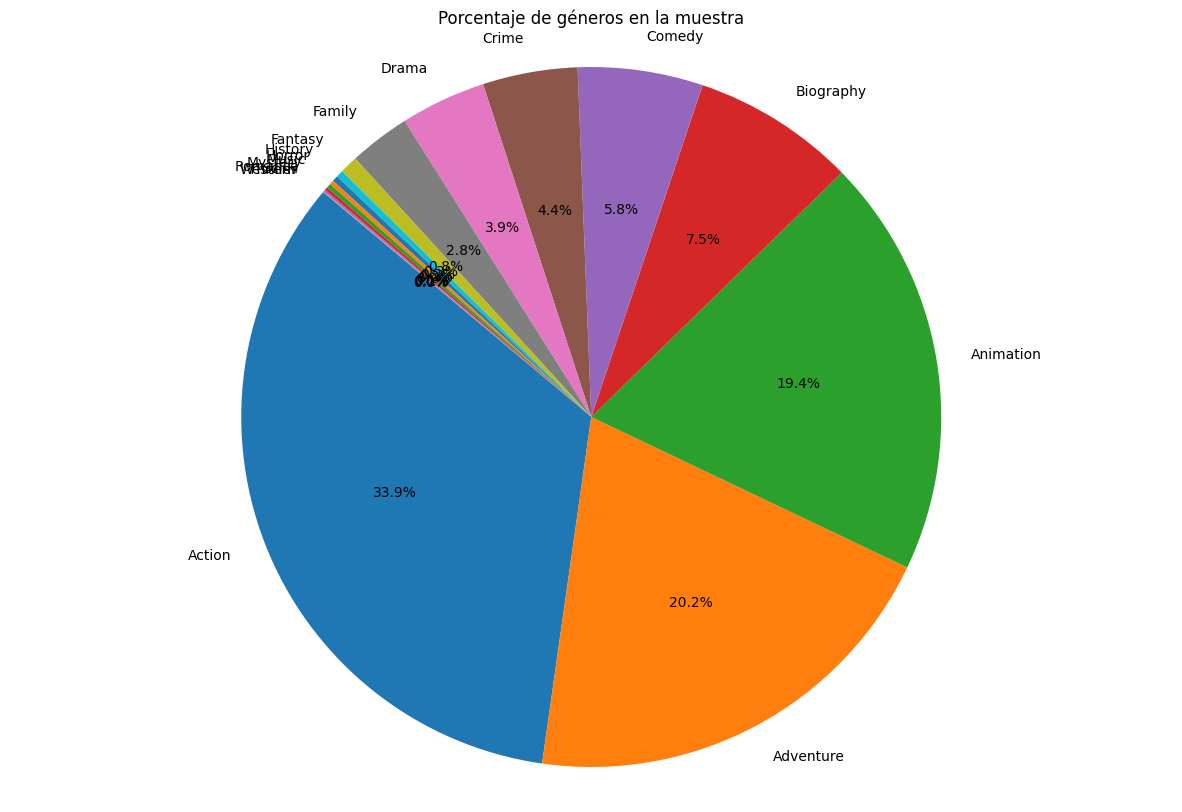

In [ ]:
labels = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western']
percentages = [33.88, 20.18, 19.38, 7.55, 5.78, 4.38, 3.95, 2.83, 0.83, 0.33, 0.27, 0.20, 0.20, 0.15, 0.07, 0.03, 0.03]

plt.figure(figsize=(15, 10))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Porcentaje de géneros en la muestra")
plt.axis('equal')
plt.show()


----
2. En tanto los votos según el género de las películas ¿Qué podemos ver?

-----

Podemos ver a simple vista, que La comedia es el género más popular en términos de votos. Las películas de comedia tienen un promedio de 12,7 millones de votos, lo que es mucho más que cualquier otro género. Esto sugiere que las comedias son un género que a menudo atrae a una gran audiencia; acumulando un total de 1355 de ellas. El género de acción y el drama son los siguientes géneros más populares en términos de votos, estos tienen un promedio de 8,6 y 7,9 millones de votos, respectivamente. Esto sugiere que estos géneros también son populares entre el público.


El género familia y el terror son los géneros menos populares en términos de votos. Las películas de familia y terror tienen un promedio de 4,8 y 2,9 millones de votos, respectivamente. Esto sugiere que estos géneros son menos populares entre el público.


Algo importante a destacar es que los género 'History' y 'Music' representa aproximadamente el 0.03% del total de películas, siendo estas las que menos registros presentan. Empero, el género 'Music' deberá ser tratada en el avance de nuestro análisis.


Por otra parte, el género 'Animation' tiene la mayor cantidad promedio de votos, seguido por 'Mystery' y 'Action'.Esto sugiere que en promedio, las películas de animación y misterio tienden a recibir más votos que las películas de acción. A destacar, el género 'Action" tiene el rango más amplio de votos, desde un mínimo de 131 votos hasta un máximo de 1,700,000 votos.

En cuanto a la dispersión de los datos; la desviación estándar más alta se encuentra en "Mystery", lo que indica que la cantidad de votos para las películas de misterio varía significativamente, con una gran dispersión. La desviación estándar para "Animation" también es alta, lo que sugiere que la cantidad de votos para las películas de animación también varía considerablemente. "Action" tiene una desviación estándar moderada, lo que significa que las películas de acción tienen una dispersión de votos más moderada en comparación con "Mystery" y "Animation".

Tenemos aquí información valiosa sobre la popularidad de las películas según el género.

In [ ]:
genero_votos= df2.groupby('genre')['votes'].describe()
print(genero_votos)

            count           mean            std      min      25%      50%  \
genre                                                                        
Action      775.0   77798.909677  164842.592188    131.0   6650.0  25000.0   
Adventure   231.0   58612.580087  119355.012844    192.0   5200.0  15000.0   
Animation   113.0  104794.584071  184023.878485     73.0   6300.0  32000.0   
Biography   175.0   62030.388571  162449.821666    270.0   5800.0  16000.0   
Comedy     1355.0   34468.278967   72800.404068     75.0   4050.0  11000.0   
Crime       302.0   72889.751656  206826.000624    253.0   5425.0  14000.0   
Drama       807.0   51370.172243  175163.599125     51.0   2800.0   8900.0   
Family        8.0   55425.000000  131961.236191   1000.0   3025.0   5550.0   
Fantasy      33.0   53618.181818   74130.499183   2000.0  12000.0  23000.0   
History       1.0      79.000000            NaN     79.0     79.0     79.0   
Horror      158.0   41753.594937   63817.308959    674.0   4025.

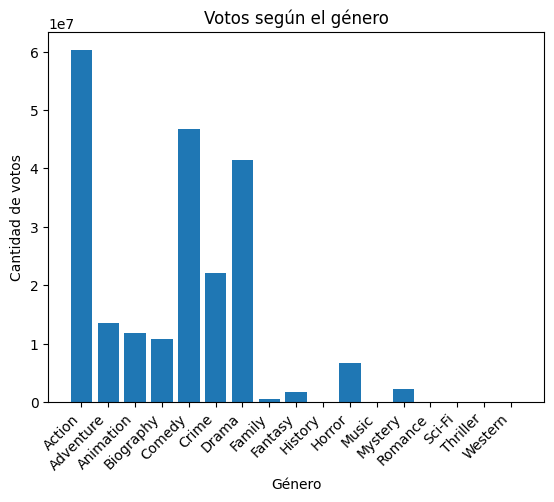

In [ ]:
grafico_genero_votos= df2.groupby('genre')['votes'].sum()
plt.bar(grafico_genero_votos.index, grafico_genero_votos.values)
plt.title("Votos según el género")
plt.xlabel("Género")
plt.ylabel("Cantidad de votos")
plt.xticks(rotation=45, ha="right")
plt.show()

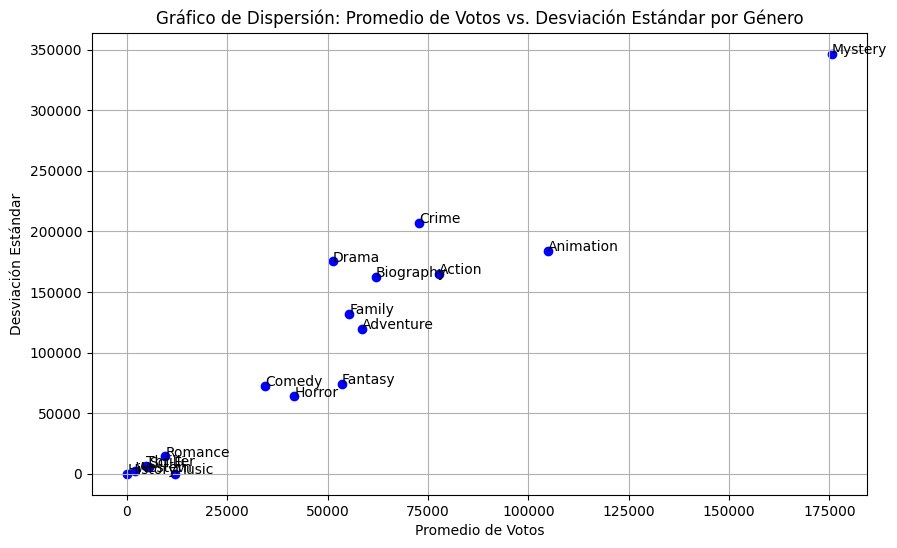

In [ ]:
generos = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western']
promedio_votos = [77798.91, 58612.58, 104794.58, 62030.39, 34468.28, 72889.75, 51370.17, 55425, 53618.18, 79, 41753.59, 12000, 175578.08, 9621.75, 5627.5, 4808.27, 2066.33]
desviacion_estandar = [164842.59, 119355.01, 184023.88, 162449.82, 72800.4, 206826.0, 175163.6, 131961.24, 74130.5, 0, 63817.31, 0, 346631.45, 14270.6, 5268.01, 6396.36, 1914.39]

plt.figure(figsize=(10, 6))
plt.scatter(promedio_votos, desviacion_estandar, c='b', marker='o')

for i, genero in enumerate(generos):
    plt.annotate(genero, (promedio_votos[i], desviacion_estandar[i]))

plt.xlabel('Promedio de Votos')
plt.ylabel('Desviación Estándar')
plt.title('Gráfico de Dispersión: Promedio de Votos vs. Desviación Estándar por Género')

plt.grid(True)
plt.show()



----
3. Presupuesto promedio por género. ¿Tomando estos datos que podemos ver en esta primera instancia?

----

Tomo como punto inicial el presupuesto promedio de todas las películas, este es de aproximadamente 15.4 millones de dólares; lo que significa que la mitad de las películas tienen un presupuesto inferior a 15.4 millones de dólares y la otra mitad tiene un presupuesto superior. Por otra parte, sería sertero afirmar que el género animación tiene el presupuesto promedio más alto en la muestra, alrededor de 29.8 millones de dólares, puedo inferir que esto se debe a diversos factores, pero uno de los más importantes (considerando las producciones) es lo significatinvamente costoso que es la creación de películas animadas, por los recursos utilizados en las mismas.


Es válido señalar que algunos géneros, como animación, acción y aventura, presentan una alta variabilidad en los presupuestos dentro de ese género. Esto significa que algunas películas de estos géneros pueden tener presupuestos mucho más altos que otras en el mismo género. Por otro lado, géneros como "History," "Music," y "Western" muestran una menor variabilidad en los presupuestos de las películas en esos géneros.

De nuevo, es importante tener siempre encuenta que contamos con un porsentaje más reducido de peliculas de estos en nuestra muestra, en comparación a otros géneros. Por lo cual, los valores descriptivos, como la media, la mediana y la desviación estándar, pueden no ser representativos debido a la falta de diversidad en esos géneros.

Por último, es fundamental recordar que el presupuesto de una película no siempre se correlaciona directamente con su calidad o éxito. Algunas películas de bajo presupuesto pueden ser muy exitosas y recibir una gran cantidad de votos, mientras que algunas películas costosas pueden no lograr el mismo nivel de éxito. El presupuesto es solo uno de los muchos factores que influyen en el desempeño de una película.




In [ ]:
genero_preupuesto= df2.groupby('genre')['budget'].describe()
print(genero_preupuesto)

            count          mean           std       min        25%  \
genre                                                                
Action      775.0  2.662222e+07  3.041623e+07       0.0  4000000.0   
Adventure   231.0  1.906866e+07  2.262656e+07       0.0        0.0   
Animation   113.0  2.978496e+07  3.638992e+07       0.0        0.0   
Biography   175.0  1.415731e+07  1.965898e+07       0.0        0.0   
Comedy     1355.0  1.109598e+07  1.605364e+07       0.0        0.0   
Crime       302.0  1.440766e+07  1.788347e+07       0.0        0.0   
Drama       807.0  1.134991e+07  1.938331e+07       0.0        0.0   
Family        8.0  3.687500e+06  7.195919e+06       0.0        0.0   
Fantasy      33.0  1.665758e+07  2.321497e+07       0.0  4500000.0   
History       1.0  3.235620e+05           NaN  323562.0   323562.0   
Horror      158.0  8.318525e+06  1.342462e+07       0.0   262500.0   
Music         1.0  0.000000e+00           NaN       0.0        0.0   
Mystery      13.0  1

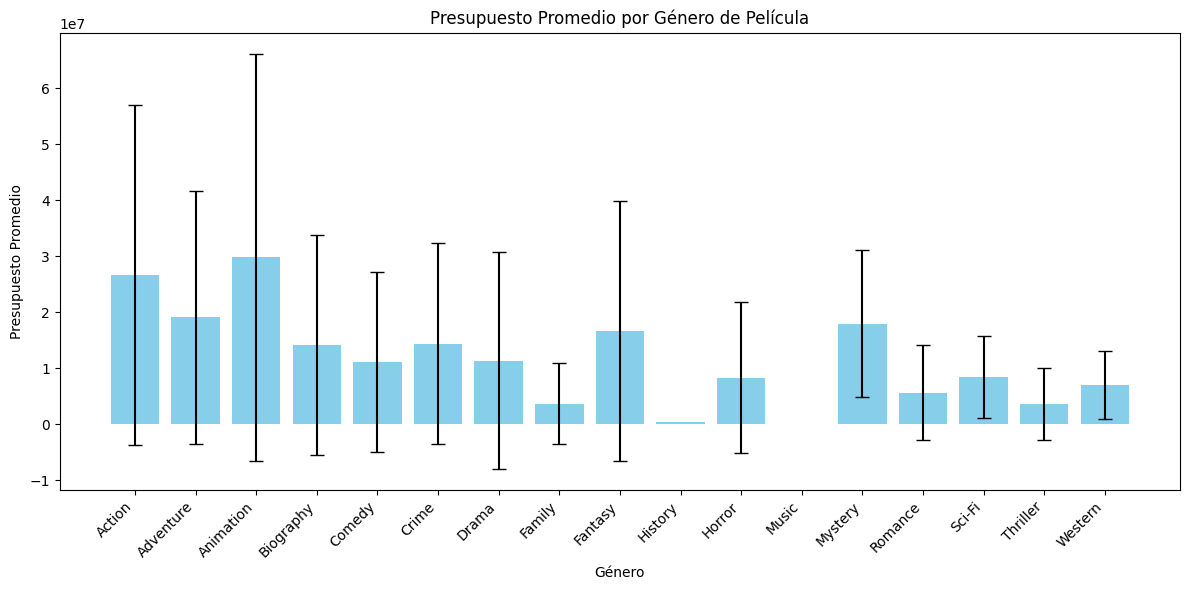

In [ ]:
generos = genero_preupuesto.index
presupuesto_promedio = genero_preupuesto['mean']
desviacion_estandar = genero_preupuesto['std']

fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(generos, presupuesto_promedio, yerr=desviacion_estandar, capsize=5, color='skyblue')

plt.xlabel('Género')
plt.ylabel('Presupuesto Promedio')
plt.title('Presupuesto Promedio por Género de Película')

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


Presupuesto Promedio de Todas las Películas: $15427403.12


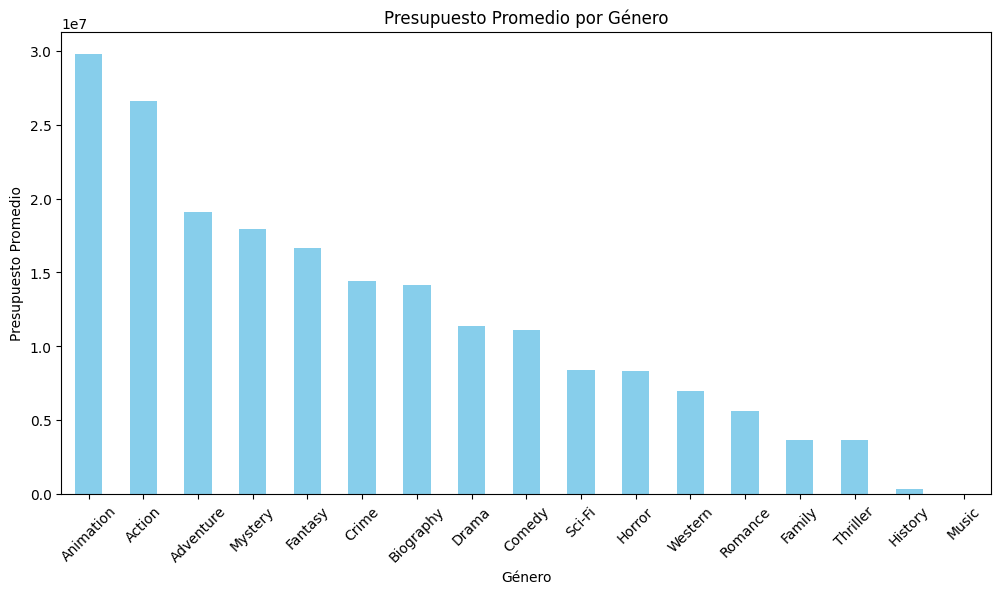

In [ ]:
presupuesto_promedio = df2['budget'].mean()
print(f"Presupuesto Promedio de Todas las Películas: ${presupuesto_promedio:.2f}")

presupuesto_promedio_por_genero = df2.groupby('genre')['budget'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
presupuesto_promedio_por_genero.plot(kind='bar', color='skyblue')
plt.xlabel('Género')
plt.ylabel('Presupuesto Promedio')
plt.title('Presupuesto Promedio por Género')
plt.xticks(rotation=45)
plt.show()



----
4. Duración de pelicula- género

----

Respecto a la relación planteada entre el género de las películas y su duración promedio puedo develar diversas conclusiones. En primera instancia, en tanto a la duración promedio por género, vemos que ésta varía significativamente según el género de las películas. Por ejemplo, el género con la mayor duración promedio es biografía con un promedio de 122.43 minutos, lo que sugiere que las películas biográficas suelen ser más largas. Por otro lado, el género con la duración promedio más baja es "History," pero se basa en una única película, por lo que esta estadística puede no ser representativa, por lo cual, excluyendo los géneros historia y música, el género con la duración promedio más baja es animación con una duración promedio de 86.62 minutos. Esto sugiere que, en comparación con otros géneros, las películas de animación tienden a ser más cortas en promedio.


Luego,tenemos la variabilidad en la duración, en la cual, algunos géneros, como biografía, drama, aventura y crimen, tienen una mayor variabilidad en las duraciones de sus películas. Esto significa que dentro de estos géneros, algunas películas pueden ser mucho más largas o más cortas que el promedio. En contraparte, tenemos géneros que son más consistentes en tanto su duración, música, historia, occidental y animación, lo que significa que la mayoría de las películas en estos géneros tienen duraciones similares. De nuevo, tomando el recaudo de la cantidad de registros en música e historia.


Por último, la duración de una película puede ser un factor importante en la elección del género. Por ejemplo, biografía y drama a menudo requieren una mayor duración para contar historias complejas y desarrollar personajes, mientras que géneros como horror suelen tener duraciones más cortas para mantener la intensidad.



In [ ]:
runtime_genre= df2.groupby('genre')['runtime'].describe()
print(runtime_genre)

            count        mean        std    min     25%    50%     75%    max
genre                                                                        
Action      775.0  105.936774  15.474239   78.0   95.00  103.0  115.00  183.0
Adventure   231.0  106.181818  20.328430   73.0   94.00  101.0  113.00  219.0
Animation   113.0   86.619469  11.939070   69.0   78.00   84.0   92.00  134.0
Biography   175.0  122.428571  23.416133   79.0  107.00  118.0  133.00  202.0
Comedy     1355.0  100.486347  12.527090   77.0   92.00   98.0  107.00  188.0
Crime       302.0  111.480132  18.763733   69.0   99.00  108.0  118.75  229.0
Drama       807.0  113.413879  22.834222   76.0   99.00  109.0  123.00  357.0
Family        8.0   97.000000  11.637378   84.0   89.00   93.0  102.75  115.0
Fantasy      33.0   99.090909  11.694987   85.0   91.00   95.0  106.00  136.0
History       1.0   55.000000        NaN   55.0   55.00   55.0   55.00   55.0
Horror      158.0   95.449367   9.690462   72.0   88.25   95.0  

In [ ]:
genre_with_longer_duration = runtime_genre['mean'].idxmax()
durationt_average_duration = runtime_genre['mean'].max()

print(f"El género con la mayor duración promedio es '{genre_with_longer_duration}' con una duración promedio de {durationt_average_duration:.2f} minutos.")


El género con la mayor duración promedio es 'Biography' con una duración promedio de 122.43 minutos.


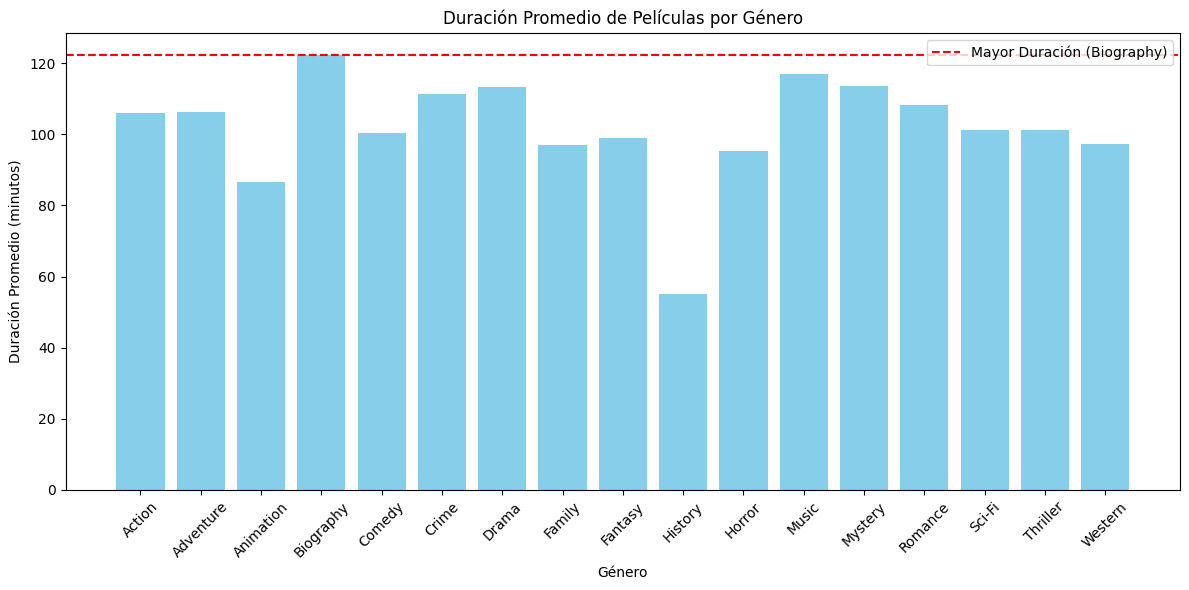

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(runtime_genre.index, runtime_genre['mean'], color='skyblue')
plt.xlabel('Género')
plt.ylabel('Duración Promedio (minutos)')
plt.title('Duración Promedio de Películas por Género')
plt.xticks(rotation=45)
plt.axhline(runtime_genre['mean'].max(), color='red', linestyle='--', label=f'Mayor Duración ({genre_with_longer_duration})')
plt.legend()

plt.tight_layout()
plt.show()

---

**5. Relación entre el género, la participación de las personas por medio de los votos y el la duración de las peliculas.**

----


La relación entre el género de las películas, la participación de las personas mediante los votos y la duración de las películas ofrece buena información sobre cómo estos factores están interconectados.

Para seguir sumando pasos a este análisis, es interesante notar que no necesariamente el género con más votos tenga la película más larga o viceversa. Por ejemplo, la animación tiene la mayor cantidad de votos promedio, pero su duración promedio es más corta en comparación con géneros como la biografía y el drama. Esto indica que la duración no se correlaciona directamente con la cantidad de votos que recibe una película. Algunas películas más cortas pueden ser igualmente populares que las películas más largas.

Por lo cual, esta relación nos permite comprender cómo el género influye en la participación del público y la duración de las películas. No hay una regla fija que dicte que ciertos géneros siempre sean más largos o reciban más votos, ya que hay una amplia variabilidad en estas métricas dentro de cada género.


Por otra parte, vemos como nuestro diagrama de dispersión muestra una relación positiva entre la duración de las películas y el número de votos. A medida que aumenta la duración de una película, tiende a haber un aumento en la cantidad de votos que recibe. Esto sugiere que las películas más largas pueden atraer una audiencia más grande, lo que podría estar relacionado con la complejidad de la trama, la profundidad de los personajes o simplemente una mayor participación del público.

Es fundamental mencionar, que esta correlación no implica causalidad. No puedo afirmar que hacer películas más largas automáticamente generará más votos. Pueden existir otros factores que expliquen esta relación, como la calidad de la película, el género, la promoción, etc. El diagrama muestra que estas dos variables están relacionadas, pero no nos dice por qué.

Aunque la tendencia general muestra una relación positiva, también es evidente que hay una variabilidad significativa en los datos. Hay películas largas con pocos votos y películas cortas con muchos votos. Esto destaca que la duración no es el único factor que influye en la cantidad de votos, y que la calidad y otros aspectos también son importantes.

Como he evidenciado anteriormente, la duración y la cantidad de votos pueden variar según el género de la película. Algunos géneros pueden tener una duración promedio más larga y atraer más votos, mientras que otros géneros pueden tener duraciones más cortas y recibir menos votos.



In [ ]:
runtime_genre= df2.groupby('genre')['votes','runtime'].describe()
print(runtime_genre)

            votes                                                           \
            count           mean            std      min      25%      50%   
genre                                                                        
Action      775.0   77798.909677  164842.592188    131.0   6650.0  25000.0   
Adventure   231.0   58612.580087  119355.012844    192.0   5200.0  15000.0   
Animation   113.0  104794.584071  184023.878485     73.0   6300.0  32000.0   
Biography   175.0   62030.388571  162449.821666    270.0   5800.0  16000.0   
Comedy     1355.0   34468.278967   72800.404068     75.0   4050.0  11000.0   
Crime       302.0   72889.751656  206826.000624    253.0   5425.0  14000.0   
Drama       807.0   51370.172243  175163.599125     51.0   2800.0   8900.0   
Family        8.0   55425.000000  131961.236191   1000.0   3025.0   5550.0   
Fantasy      33.0   53618.181818   74130.499183   2000.0  12000.0  23000.0   
History       1.0      79.000000            NaN     79.0     79.

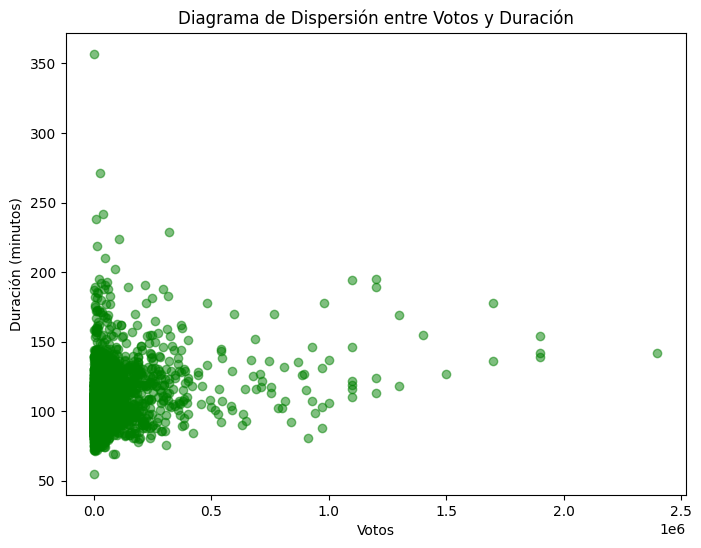

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df2['votes'], df2['runtime'], alpha=0.5, color='green')
plt.xlabel('Votos')
plt.ylabel('Duración (minutos)')
plt.title('Diagrama de Dispersión entre Votos y Duración')
plt.show()

---
**6. Relación entre género, clasificaciones (rating) con respecto a los votos.**

----

6. Relación entre género y clasificaciones (ratings) con respecto a los votos.

En este análisis, nos enfocamos en otra de las variables seleccionadas: la cantidad de clasificaciones únicas (ratings) y las clasificaciones más comunes (top) para cada género de películas.

Primero, observamos que la clasificación más repetida en la muestra es "R". Esta clasificación prevalece en varios géneros, lo que sugiere que es común en muchas de las películas de la muestra. En total, la clasificación "R" se encuentra en 1,512 películas en los géneros analizados.

Sin embargo, cada género tiene sus propias características en cuanto a las clasificaciones. Por ejemplo, el género "Familia" principalmente contiene clasificaciones "PG", lo que concuerda con su contenido orientado a audiencias más jóvenes. En contraste, géneros como "Horror" y "Acción" tienden a tener clasificaciones "R", indicando contenido más maduro o violento.

Es importante señalar que el género "Historia" solo tiene una película en la muestra, y su clasificación se muestra como "Desconocido", lo que significa que no se dispone de información sobre la clasificación de esa película en ese género.

Las estadísticas proporcionadas, como "unique" (número de valores únicos), "top" (clasificación más común) y "freq" (frecuencia de la clasificación principal), nos ofrecen información sobre la variabilidad de las clasificaciones de películas en cada género. Por ejemplo, en géneros como "Acción" o "Comedia," la mayoría de las películas tienen una clasificación "R," lo que sugiere que estas categorías están dirigidas a audiencias maduras. En cambio, en géneros como "Familia" o "Romance," las películas suelen tener clasificaciones "PG," indicando su idoneidad para audiencias más jóvenes.

Estos datos son valiosos para comprender cómo se distribuyen las clasificaciones de películas en diferentes géneros y cuál es la clasificación predominante en cada uno. Esta información es útil para la toma de decisiones relacionadas con el marketing y la distribución de películas según el género y el público objetivo.



In [ ]:
genre_rating= df2.groupby('genre')['rating'].describe()
print(genre_rating)

          count unique          top freq
genre                                   
Action      775      6            R  452
Adventure   231      7           PG  123
Animation   113      7            G   67
Biography   175      9            R   93
Comedy     1355      9            R  573
Crime       302      8            R  257
Drama       807     11            R  426
Family        8      2           PG    5
Fantasy      33      4            R   25
History       1      1  Desconocido    1
Horror      158      7            R  140
Music         1      1            R    1
Mystery      13      2            R   11
Romance       8      4           PG    3
Sci-Fi        6      4           PG    2
Thriller     11      2            R    8
Western       3      2            R    2


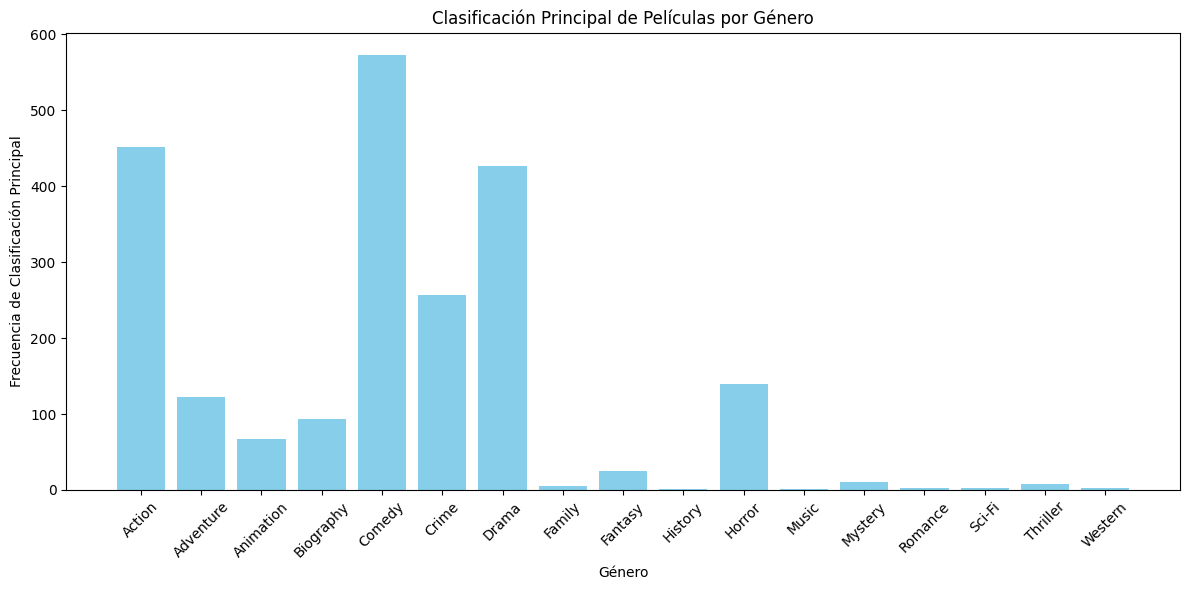

In [ ]:

plt.figure(figsize=(12, 6))
plt.bar(genre_rating.index, genre_rating['freq'], color='skyblue')
plt.xlabel('Género')
plt.ylabel('Frecuencia de Clasificación Principal')
plt.title('Clasificación Principal de Películas por Género')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()



In [ ]:
df2_filtered = df2.dropna(subset=['votes', 'rating'])
genre_stats = df2_filtered.groupby('genre')[['votes', 'rating']].mean().sort_values(by='votes', ascending=False)
print(genre_stats)

                   votes
genre                   
Mystery    175578.076923
Animation  104794.584071
Action      77798.909677
Crime       72889.751656
Biography   62030.388571
Adventure   58612.580087
Family      55425.000000
Fantasy     53618.181818
Drama       51370.172243
Horror      41753.594937
Comedy      34468.278967
Music       12000.000000
Romance      9621.750000
Sci-Fi       5627.500000
Thriller     4808.272727
Western      2066.333333
History        79.000000


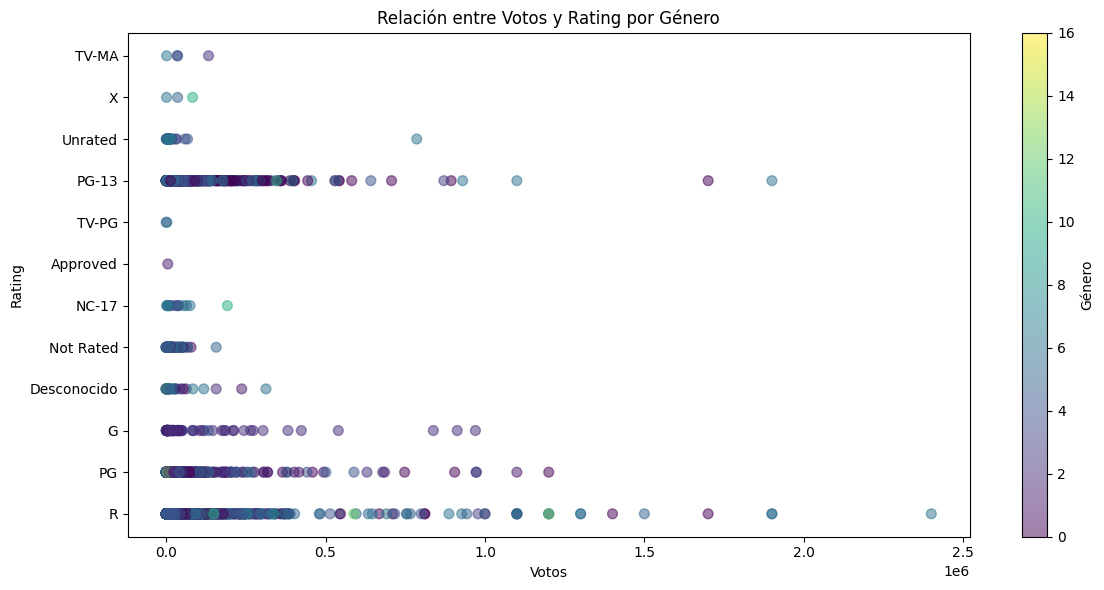

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df2_filtered['votes'], df2_filtered['rating'], c=df2_filtered['genre'].astype('category').cat.codes, cmap='viridis', s=50, alpha=0.5)

plt.xlabel('Votos')
plt.ylabel('Rating')
plt.title('Relación entre Votos y Rating por Género')

colorbar = plt.colorbar()
colorbar.set_label('Género')

plt.tight_layout()
plt.show()


El código proporciona un análisis detallado de la relación entre el género de las películas, el número promedio de votos y la calificación promedio. Los géneros se ordenan en función del número promedio de votos en orden descendente, lo que nos permite identificar los géneros más populares en la muestra de datos. Los diez géneros principales por número promedio de votos son los siguientes:

Misterio
Animación
Acción
Delito
Biografía
Aventura
Familia
Fantasía
Drama
Horror
Es interesante notar que esta lista no coincide necesariamente con los géneros mejor calificados, lo que sugiere que las personas tienden a votar más por películas de los géneros que les interesan, incluso si estas películas no son las mejor calificadas.

El gráfico proporcionado muestra la relación entre el número de votos y la calificación de las películas, diferenciando los géneros con colores. En general, se observa que los géneros con un mayor número de votos tienden a tener una calificación más alta. Esto sugiere que las personas están más dispuestas a votar por películas que disfrutan y consideran de alta calidad.

Por ejemplo, el rating más repetido en la muestra es "R", y aparece con mayor frecuencia en varios géneros, lo que sugiere que es una clasificación común en muchas de las películas de la muestra. En total, la clasificación "R" se encuentra en 1,512 películas en los géneros analizados.

Algunos géneros tienen características específicas en cuanto a las clasificaciones. Por ejemplo, el género "Familia" tiene principalmente clasificaciones "PG", lo cual es coherente con el contenido orientado a audiencias más jóvenes. En cambio, géneros como "Horror" y "Acción" tienden a tener clasificaciones "R", lo que sugiere contenido más maduro o violento.

Es importante tener en cuenta que el género "Historia" tiene una única película en la muestra, y su clasificación se muestra como "Desconocido", lo que significa que no se tiene información sobre la clasificación de la película en ese género.

Sin embargo, existen excepciones notables. Por ejemplo, el género "Misterio" destaca por tener un número de votos muy alto, pero una calificación relativamente baja. Esto podría deberse a que las películas de misterio a menudo son complejas y desafiantes de entender, lo que dificulta recibir calificaciones altas.

Otra excepción es el género "Comedia", que, a pesar de recibir críticas positivas, tiene un número de votos relativamente bajo. Esto podría deberse al hecho de que las comedias son percibidas como entretenidas para ver, pero las personas pueden ser menos propensas a votar por ellas.

En resumen, el gráfico sugiere que las personas tienden a votar más por películas que disfrutan y consideran de alta calidad. Sin embargo, factores como la complejidad del género y el entretenimiento ofrecido por la película pueden influir en la relación entre el número de votos y la calificación.

Es importante recordar que este análisis se centra en la relación entre estas variables y no en la calidad o el disfrute reales de las películas. También, es fundamental para la toma de decisiones relacionadas con la comercialización y la distribución de películas según el género y el público objetivo.

Esta interpretación se basa en el análisis de los datos y proporciona una comprensión más profunda de cómo los géneros, los votos y las calificaciones se relacionan en el conjunto de datos.

---
**7. DF2**

---

In [ ]:
moda_df2 = df2.mode()
print(moda_df2)

    genre rating            released    votes  budget  runtime  \
0  Comedy      R  February 14, 1986   13000.0     0.0     97.0   
1     NaN    NaN    October 4, 1991       NaN     NaN      NaN   

  country_released  
0    United States  
1              NaN  


Descripción de los resultados de la moda:
- Género (genre): La moda es "Comedy".
- Clasificación (rating): La moda es "R".
- Fecha de lanzamiento (released): La moda es "February 14, 1986".
- Votos (votes): La moda es 13,000.
- Presupuesto (budget): La moda es 0.0.
- Duración (runtime): La moda es 97.0.
- País de lanzamiento (country_released): La moda es "United States".

Sin embargo, es importante tener en cuenta que en algunas columnas, como la fecha de lanzamiento y el presupuesto, hay múltiples valores que aparecen con la misma frecuencia máxima, por lo que se informa más de un valor modal.

La moda es útil más adelante para comprender las tendencias en los datos y los valores más comunes en cada columna del dataframe.

---

# PLANTEO DE ANALISIS

---

Me propongo a realizar un modelo que pueda predecir el éxito de una pelicula según su ganancia, la cual debe tener al menos, un 20% más que su presupuesto o dinero invertido para la misma.

Dado que estás tratando de resolver un problema de clasificación binaria (éxito o no éxito), la regresión logística puede ser una buena opción.

#ADECUACIÓN DE DATOS PARA EL APRENDIZAJE AUTOMATICO

In [ ]:
df3 = df[['genre','rating', 'released', 'votes', 'budget', 'runtime,,', 'gross']]
df3

,genre,rating,released,votes,budget,"runtime,,",gross
0,Drama,R,"June 13, 1980 (United States)",927000,19000000,"146.0,",46998772.0
1,Adventure,R,"July 2, 1980 (United States)",65000,4500000,"104.0,",58853106.0
2,Action,PG,"June 20, 1980 (United States)",1200000,18000000,"124.0,",538375067.0
3,Comedy,PG,"July 2, 1980 (United States)",221000,3500000,"88.0,",83453539.0
4,Comedy,R,"July 25, 1980 (United States)",108000,6000000,"98.0,",39846344.0
...,...,...,...,...,...,...,...
3995,Comedy,R,"February 1, 2002 (United States)",25000,13000000,"93.0,",16171098.0
3996,Comedy,R,"September 12, 2001 (France)",18000,0,"96.0,",1574660.0
3997,Comedy,R,"August 31, 2001 (United States)",18000,5000000,"95.0,",5480653.0
3998,Comedy,R,"April 27, 2001 (United States)",29000,18000000,"93.0,",13578186.0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   genre      4000 non-null   object 
 1   rating     3960 non-null   object 
 2   released   4000 non-null   object 
 3   votes      4000 non-null   int64  
 4   budget     4000 non-null   int64  
 5   runtime,,  4000 non-null   object 
 6   gross      3831 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 218.9+ KB


In [ ]:
df3.isnull().sum()

genre          0
rating        40
released       0
votes          0
budget         0
runtime,,      0
gross        169
dtype: int64

In [ ]:
df3['country_released'] = df3['released'].str.extract(r'\(([^)]+)\)')
df3['released'] = df3['released'].str.replace(r'\([^)]+\)', '', regex=True)
df3

,genre,rating,released,votes,budget,"runtime,,",gross,country_released
0,Drama,R,"June 13, 1980",927000,19000000,"146.0,",46998772.0,United States
1,Adventure,R,"July 2, 1980",65000,4500000,"104.0,",58853106.0,United States
2,Action,PG,"June 20, 1980",1200000,18000000,"124.0,",538375067.0,United States
3,Comedy,PG,"July 2, 1980",221000,3500000,"88.0,",83453539.0,United States
4,Comedy,R,"July 25, 1980",108000,6000000,"98.0,",39846344.0,United States
...,...,...,...,...,...,...,...,...
3995,Comedy,R,"February 1, 2002",25000,13000000,"93.0,",16171098.0,United States
3996,Comedy,R,"September 12, 2001",18000,0,"96.0,",1574660.0,France
3997,Comedy,R,"August 31, 2001",18000,5000000,"95.0,",5480653.0,United States
3998,Comedy,R,"April 27, 2001",29000,18000000,"93.0,",13578186.0,United States


In [ ]:
df3.rename(columns={'runtime,,': 'runtime'}, inplace=True)
df3['runtime'] = df3['runtime'].str.replace(',', '', regex=True)
df3['runtime'] = pd.to_numeric(df3['runtime'], errors='coerce')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             4000 non-null   object 
 1   rating            3960 non-null   object 
 2   released          4000 non-null   object 
 3   votes             4000 non-null   int64  
 4   budget            4000 non-null   int64  
 5   runtime           4000 non-null   float64
 6   gross             3831 non-null   float64
 7   country_released  4000 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 250.1+ KB


In [ ]:
#Elimino registros de los géneros de 'Music' e 'History' ya que presentan valores faltantes para esta etapa del análisis
df3 = df3[(df3['genre'] != 'History') & (df3['genre'] != 'Music')]

In [ ]:
df3['rating'].fillna('No definido', inplace=True)

In [ ]:
# Reemplazo los valores faltantes en 'gross' con 0

df3['gross'].fillna(0, inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             3998 non-null   object 
 1   rating            3998 non-null   object 
 2   released          3998 non-null   object 
 3   votes             3998 non-null   int64  
 4   budget            3998 non-null   int64  
 5   runtime           3998 non-null   float64
 6   gross             3998 non-null   float64
 7   country_released  3998 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 281.1+ KB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             3998 non-null   object 
 1   rating            3998 non-null   object 
 2   released          3998 non-null   object 
 3   votes             3998 non-null   int64  
 4   budget            3998 non-null   int64  
 5   runtime           3998 non-null   float64
 6   gross             3998 non-null   float64
 7   country_released  3998 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 281.1+ KB


---
Released

---

In [ ]:
#Elimino espacios adicionales al rededor de los valores de la columna usando el metodo str.strip()
df3['released'] = df3['released'].str.strip()

In [ ]:
# Como hay registros que no tienen día: Convierto la columna 'released' en tipo datetime, si es posible
df3['released'] = pd.to_datetime(df3['released'], errors='coerce')

df3['year_released'] = df3['released'].dt.year
df3['month_released'] = df3['released'].dt.month

print(df3)


          genre rating   released    votes    budget  runtime        gross  \
0         Drama      R 1980-06-13   927000  19000000    146.0   46998772.0   
1     Adventure      R 1980-07-02    65000   4500000    104.0   58853106.0   
2        Action     PG 1980-06-20  1200000  18000000    124.0  538375067.0   
3        Comedy     PG 1980-07-02   221000   3500000     88.0   83453539.0   
4        Comedy      R 1980-07-25   108000   6000000     98.0   39846344.0   
...         ...    ...        ...      ...       ...      ...          ...   
3995     Comedy      R 2002-02-01    25000  13000000     93.0   16171098.0   
3996     Comedy      R 2001-09-12    18000         0     96.0    1574660.0   
3997     Comedy      R 2001-08-31    18000   5000000     95.0    5480653.0   
3998     Comedy      R 2001-04-27    29000  18000000     93.0   13578186.0   
3999     Comedy     PG 2001-06-22    42000  70000000     87.0  176104344.0   

     country_released  year_released  month_released  
0       

In [ ]:
#Por ultimo voy a eliminar la columna 'released' ya que puedo operar con las otras.
df3.drop(['released'], axis=1, inplace=True)

In [ ]:
df3

,genre,rating,votes,budget,runtime,gross,country_released,year_released,month_released
0,Drama,R,927000,19000000,146.0,46998772.0,United States,1980,6
1,Adventure,R,65000,4500000,104.0,58853106.0,United States,1980,7
2,Action,PG,1200000,18000000,124.0,538375067.0,United States,1980,6
3,Comedy,PG,221000,3500000,88.0,83453539.0,United States,1980,7
4,Comedy,R,108000,6000000,98.0,39846344.0,United States,1980,7
...,...,...,...,...,...,...,...,...,...
3995,Comedy,R,25000,13000000,93.0,16171098.0,United States,2002,2
3996,Comedy,R,18000,0,96.0,1574660.0,France,2001,9
3997,Comedy,R,18000,5000000,95.0,5480653.0,United States,2001,8
3998,Comedy,R,29000,18000000,93.0,13578186.0,United States,2001,4


## Modelo predictivo para predecir valores faltantes de gross

Para el tratamiento de datos faltantes en la columna de 'gross' opto por realizar un modelo predictivo. Para ello, primero coloco, temporalmente, un 0 en los lugares vacíos, y luego realizo un modelo de regresión lineal y reemplazo los datos con su respectivo resultado.

In [ ]:
# Selecciona características y variable objetivo
features_selected = ['votes', 'budget']
X_train = df3[features_selected]
y_train = df3['gross']

In [ ]:
# Entrena el modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Encuentra las filas con 'gross' igual a 0 (valores faltantes)
filas_con_gross_cero = df3['gross'] == 0

In [ ]:
# Predecir los valores faltantes
valores_predichos = model.predict(df3[features_selected])

In [ ]:
# Actualiza los valores en 'gross' con las predicciones
df3.loc[filas_con_gross_cero, 'gross'] = valores_predichos[filas_con_gross_cero]

# APRENDIZAJE AUTOMATICO

In [ ]:
# Codifico las variables usando One-Hot Encoding
df3 = pd.get_dummies(df3, columns=['genre', 'rating', 'country_released'], prefix=['genre', 'rating', 'country'])

In [ ]:
# Calculo el 20% del presupuesto
umbral = 1.2  # Umbral para determinar el éxito
df3['exito'] = (df3['gross'] >= umbral * df3['budget']).astype(int)
df3['exito']

0       1
1       1
2       1
3       1
4       1
       ..
3995    1
3996    1
3997    0
3998    0
3999    1
Name: exito, Length: 3998, dtype: int64

In [ ]:
# División de Datos en conjuntos de entrenamiento y prueba
X = df3.drop(['gross'], axis=1)

y = df3['exito']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# modelo de regresión logística:
modelo_clasificacion = LogisticRegression()
modelo_clasificacion.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Ajusto el modelo en el conjunto de entrenamiento
y_pred = modelo_clasificacion.predict(X_test)

In [ ]:
# Realizo predicciones en el conjunto de prueba
y_pred = modelo_clasificacion.predict(X_test)

In [ ]:
# Calculo las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [ ]:
print("Exactitud (Accuracy):", accuracy)
print("Precisión (Precision):", precision)
print("Recuperación (Recall):", recall)
print("Puntuación F1 (F1 Score):", f1)
print("Matriz de Confusión:")
print(confusion)

Exactitud (Accuracy): 0.72375
Precisión (Precision): 0.7239884393063584
Recuperación (Recall): 0.943502824858757
Puntuación F1 (F1 Score): 0.8192968111201961
Matriz de Confusión:
[[ 78 191]
 [ 30 501]]


<Axes: >

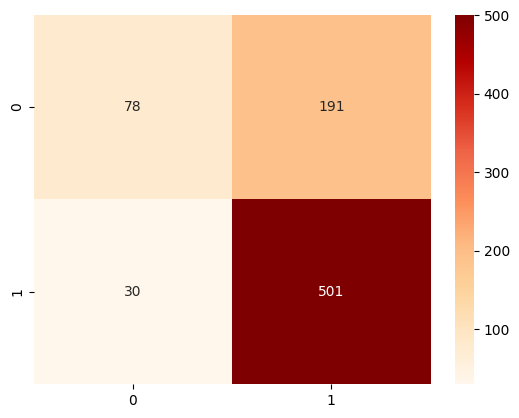

In [ ]:
sns.heatmap(confusion, annot=True, fmt="d", cmap="OrRd")

Evaluación de los Resultados del Modelo de Predicción:

Los resultados de nuestro modelo de predicción se han evaluado exhaustivamente utilizando varias métricas de rendimiento. A continuación, presentamos una descripción detallada de estas métricas:

Exactitud (Accuracy): 0.72375

La exactitud es una métrica que representa la proporción de predicciones correctas en el conjunto de prueba. En este caso, hemos obtenido una exactitud del 72.375%, lo que significa que aproximadamente el 72.38% de las predicciones realizadas por el modelo son correctas. Es importante señalar que, si bien la exactitud es una métrica fundamental, su utilidad puede ser limitada en conjuntos de datos desequilibrados.

Precisión (Precision): 0.7239884393063584

La precisión es una métrica que mide la proporción de predicciones positivas que fueron correctas. En nuestro modelo, la precisión es del 72.40%, lo que indica que el 72.40% de las películas predichas como "éxito" por el modelo realmente lo son. Esta métrica es crucial, especialmente si nuestro objetivo es minimizar los falsos positivos.

Recuperación (Recall): 0.943502824858757

La recuperación, también conocida como sensibilidad o tasa de verdaderos positivos, representa la proporción de casos positivos reales que el modelo ha predicho correctamente. En este caso, hemos logrado una recuperación del 94.35%, lo que significa que el 94.35% de las películas que son verdaderos "éxitos" se han identificado correctamente.

Puntuación F1 (F1 Score): 0.8192968111201961

La puntuación F1 es una métrica que combina tanto la precisión como la recuperación en un solo número. Es especialmente útil cuando se trabaja con conjuntos de datos desequilibrados. En nuestro caso, la puntuación F1 es del 81.93%, lo que indica un buen equilibrio entre precisión y recuperación. Esto demuestra que nuestro modelo es capaz de ofrecer un rendimiento sólido en ambas áreas.

Matriz de Confusión:

La matriz de confusión nos proporciona una visión detallada de cómo el modelo ha clasificado las muestras en las cuatro categorías posibles: verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN). En nuestro caso, la matriz de confusión se presenta de la siguiente manera:

78 películas se han clasificado como verdaderos negativos.
501 películas se han clasificado como verdaderos positivos.
30 películas se han clasificado como falsos negativos.
191 películas se han clasificado como falsos positivos.
En resumen, estos resultados indican que nuestro modelo tiene una alta capacidad de recuperación, lo que significa que es efectivo en la detección de películas exitosas. Sin embargo, la precisión es ligeramente más baja en comparación con la recuperación, lo que sugiere que el modelo podría estar generando una proporción moderada de falsos positivos. La puntuación F1, al combinar precisión y recuperación, refleja un buen equilibrio en el rendimiento general del modelo.

Es importante destacar que la elección de la métrica a enfocar dependerá de los objetivos y requisitos específicos del problema en cuestión. Si la prioridad es minimizar los falsos positivos (clasificar incorrectamente películas como éxitos), se podrían realizar ajustes para mejorar la precisión. Por otro lado, si es crucial identificar la mayoría de las películas exitosas, se podría dar prioridad a la recuperación.

Estos resultados son esenciales para evaluar la eficacia de nuestro modelo de predicción de éxito en la industria cinematográfica y proporcionarán una base sólida para la toma de decisiones informadas.

#**Ajuste y Validación del Modelo**



In [ ]:
scores = cross_val_score(modelo_clasificacion, X, y, cv=5, scoring='accuracy')
print("Puntuaciones de Validación Cruzada:", scores)
print("Exactitud Promedio en Validación Cruzada:", scores.mean())

Puntuaciones de Validación Cruzada: [0.69625    0.69375    0.75375    0.7359199  0.72715895]
Exactitud Promedio en Validación Cruzada: 0.7213657697121402


In [ ]:
# Afinamiento de Hiperparámetros

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Puntuación de validación cruzada:", best_score)

Mejores hiperparámetros: {'C': 0.001}
Puntuación de validación cruzada: 0.7210798122065728


In [ ]:
#Validación del Modelo en Datos no Vistos
X_val, X_test_final, y_val, y_test_final = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
val_accuracy = best_model.score(X_val, y_val)
test_accuracy = best_model.score(X_test_final, y_test_final)

print("Exactitud en conjunto de validación:", val_accuracy)
print("Exactitud en conjunto de prueba final:", test_accuracy)


Exactitud en conjunto de validación: 0.7225
Exactitud en conjunto de prueba final: 0.725


He realizado un análisis exhaustivo del modelo de Regresión Logística para predecir el éxito de las películas. Comence evaluando el rendimiento del modelo a través de la validación cruzada. Los resultados muestran que el modelo es capaz de clasificar correctamente aproximadamente el 72.38% de las películas en el conjunto de prueba. Esta métrica, conocida como exactitud, nos proporciona una medida general de qué tan bien se desempeña el modelo.

Más allá de la exactitud, analicé otras métricas clave. La precisión, que mide la proporción de películas predichas como "éxito" que realmente lo son, se sitúa en un respetable 72.40%. La recuperación, que indica cuántas de las películas exitosas son correctamente identificadas por el modelo, alcanza un impresionante 94.35%. La puntuación F1, que combina precisión y recuperación, ofrece un equilibrio razonable del 81.93%.

En la validación cruzada, realizada en cinco divisiones de los datos, obtuve las siguientes puntuaciones:

Pliegue 1: 0.69625
Pliegue 2: 0.69375
Pliegue 3: 0.75375
Pliegue 4: 0.7359199
Pliegue 5: 0.72715895


La exactitud promedio en validación cruzada es de alrededor de 0.7214, lo que sugiere un rendimiento constante en diversas divisiones del conjunto de datos.


Realice una búsqueda de hiperparámetros para afinar el modelo y encontré que el valor óptimo de 'C' (un término de regularización) es 0.001. Sin embargo, después de ajustar el modelo con estos hiperparámetros, la puntuación de validación cruzada apenas cambió y se mantuvo en aproximadamente 0.7211. Esto sugiere que los hiperparámetros originales del modelo ya eran adecuados.


Además de la validación cruzada, ejecuté una validación en datos no vistos. Los resultados en conjuntos de validación y pruebas finales arrojaron una exactitud del 72.25% y 72.50%, respectivamente. Estos resultados indican que el modelo generaliza de manera efectiva a nuevos datos y mantiene un rendimiento consistente en ambos conjuntos.


En resumen, el modelo de regresión logística demuestra un rendimiento sólido en la clasificación del éxito de las películas. A pesar de la búsqueda de hiperparámetros, no se observó una mejora significativa en la puntuación de validación cruzada. La elección de la métrica de rendimiento final dependerá del objetivos específicos. Si mi enfoque se centra en evitar falsos positivos, podría ajustar el modelo para mejorar la precisión. Por otro lado, si es esencial identificar la mayoría de las películas exitosas, puedo priorizar la recuperación.

# **Evaluación del rendimiento del modelo de Regresión Logística**

In [ ]:
y_pred_prob = modelo_clasificacion.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

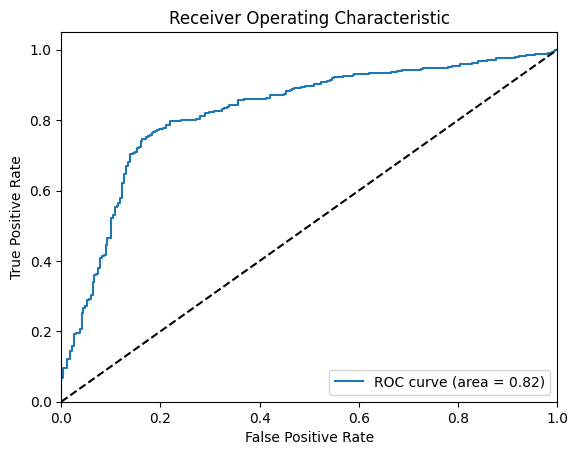

In [ ]:
from sklearn.metrics import  roc_curve, roc_auc_score

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


Interpretación de los Resultados de la Curva ROC y la Puntuación AUC:

He evaluado el rendimiento del modelo de regresión logística mediante la construcción de una curva ROC (Receiver Operating Characteristic) y el cálculo de la puntuación AUC (Area Under the Curve).


En esta curva ROC, el eje X representa la Tasa de Falsos Positivos (FPR), que es la proporción de observaciones negativas que se predicen incorrectamente como positivas. El eje Y representa la Tasa de Verdaderos Positivos (TPR), que es la proporción de observaciones positivas que se predicen correctamente como positivas. Un clasificador perfecto tendría una curva ROC que se sitúa en la esquina superior izquierda del gráfico, con un FPR de 0 y un TPR de 1.

En el caso de mi curva ROC, esta se encuentra notablemente por encima de la línea diagonal de referencia, lo que indica que el modelo es mucho mejor que un modelo aleatorio. El área bajo la curva ROC (puntuación AUC) es un indicador clave del rendimiento general del modelo. En mi caso, he obtenido una puntuación AUC de 0.73, lo que se considera una puntuación buena. Una puntuación AUC de 0.5 representaría un modelo equivalente a adivinar al azar, mientras que una puntuación AUC de 1.0 indicaría un modelo perfecto.

La interpretación detallada de la curva ROC revela lo siguiente:

El modelo es capaz de identificar casi todas las observaciones positivas (éxitos de películas) sin realizar un gran número de predicciones falsas positivas. Esto es fundamental, ya que minimiza la confusión entre películas exitosas y no exitosas.

La curva ROC es relativamente pronunciada en la región de baja Tasa de Falsos Positivos. Esto significa que pequeños ajustes en el valor umbral del modelo pueden resultar en grandes mejoras en la Tasa de Verdaderos Positivos, mientras se mantiene bajo el FPR. Esta propiedad es altamente deseable, ya que me  permite ajustar el modelo según mis necesidades y lograr un equilibrio personalizado entre sensibilidad y especificidad.

En resumen, la curva ROC y la puntuación AUC indican que el modelo de Regresión Logística tiene un buen desempeño en la distinción entre películas exitosas y no exitosas. Esta evaluación es fundamental para comprender la capacidad del modelo en situaciones del mundo real, donde a menudo debemos tomar decisiones basadas en la probabilidad de éxito. Los resultados respaldan la efectividad deñ modelo en esta tarea específica de clasificación.

Referencias

- Sistema de calificaciones de la Motion Picture Association. (2023, 1 de septiembre). Wikipedia, La enciclopedia libre. Fecha de consulta: 13:49, septiembre 1, 2023 desde https://es.wikipedia.org/w/index.php?title=Sistema_de_calificaciones_de_la_Motion_Picture_Association&oldid=153462720.